In [3]:
import pickle
import os
import matplotlib.pyplot as plt

In [62]:
with open(os.path.join('training-results', 'forgery-type_mixed_individuals-19022024_104756_n10_m3_p3_writers600_epoch400_max-iter12000.pkl'), 'rb') as pickle_file:
    loaded_data = pickle.load(pickle_file)

In [98]:
training_results_list = os.listdir(os.path.join('TRAINING_RESULTS_CEDAR_PROTOCOL_2_12_12'))

In [99]:
for file in training_results_list:
    #if file.startswith('forgery_same_'):
    with open(os.path.join('TRAINING_RESULTS_CEDAR_PROTOCOL_2_12_12', file), 'rb') as pickle_file:
        loaded_data = pickle.load(pickle_file)
        #print(file)
        print('m: '+str(loaded_data['m'])+', p: '+str(loaded_data['p'])+', w: '+str(loaded_data['writers'])+', forgery: '+str(loaded_data['same_or_mixed_individuals_in_forgery']))
        if 'EER_test_global' in loaded_data:
            print('EER teste: '+str(loaded_data['EER_test_global']))#[1]['test_eer'])+', EER teste fold 2: '+str(loaded_data['fold_results'][2]['test_eer']))
        else:
            print('EER teste 1: '+str(loaded_data['fold_results'][1]['test_eer'])+', EER teste fold 2: '+str(loaded_data['fold_results'][2]['test_eer']))
        print()

m: 1, p: 12, w: 55, forgery: mixed
EER teste 1: 0.15552028218694885, EER teste fold 2: 0.15480599647266313

m: 1, p: 12, w: 55, forgery: mixed
EER teste 1: 0.1672663139329806, EER teste fold 2: 0.16667548500881835

m: 2, p: 6, w: 55, forgery: mixed
EER teste 1: 0.2181746031746032, EER teste fold 2: 0.2160405643738977

m: 3, p: 4, w: 55, forgery: mixed
EER teste 1: 0.23719576719576718, EER teste fold 2: 0.22416225749559082

m: 1, p: 12, w: 55, forgery: same
EER teste 1: 0.2425, EER teste fold 2: 0.24273809523809523

m: 1, p: 12, w: 55, forgery: same
EER teste 1: 0.26761904761904765, EER teste fold 2: 0.24273809523809523

m: 2, p: 6, w: 55, forgery: same
EER teste 1: 0.3492857142857143, EER teste fold 2: 0.2708333333333333

m: 3, p: 4, w: 55, forgery: same
EER teste 1: 0.32761904761904764, EER teste fold 2: 0.3298809523809524



In [70]:
with open(os.path.join('training-results', 'forgery-type_mixed_individuals-19022024_104756_n10_m3_p3_writers600_epoch400_max-iter12000.pkl'), 'rb') as pickle_file:
    loaded_data = pickle.load(pickle_file)

In [95]:
loaded_data.keys()

dict_keys(['fold_results', 'n', 'm', 'p', 'zeta_s', 'zeta_d', 'sci', 'same_or_mixed_individuals_in_forgery', 'genuine_per_writer', 'forged_per_writer', 'writers', 'epoch', 'max_iterations', 'training_batch_size', 'validation_batch_size', 'learning_rate'])

In [71]:
loaded_data['EER_test_global']

0.428010374010374

In [96]:
loaded_data['fold_results'].keys()

dict_keys([1, 2])

In [97]:
loaded_data['fold_results'][1].keys()

dict_keys(['W', 'M', 'A', 'aucs', 'val_eers', 'train_loss', 'val_loss', 'test_eer', 'test_users'])

In [37]:
loaded_data['fold_results'][1]['test_eer']

KeyError: 'test_eer'

In [11]:
print('m, p: ' + str(loaded_data['m']) + ', ' + str(loaded_data['p']))
print('individuals in forgery: ' + str(loaded_data['same_or_mixed_individuals_in_forgery']))
print('genuine and forgery per writer: ' + str(loaded_data['genuine_per_writer']) + ' and ' + str(loaded_data['forged_per_writer']))
print('writers: ' + str(loaded_data['writers']) + ' | best fold: ' + str(loaded_data['best_fold']))

m, p: 1, 7
individuals in forgery: mixed
genuine and forgery per writer: 24 and 24


KeyError: 'best_fold'

In [16]:
fold_resuls = loaded_data['fold_results'][loaded_data['best_fold']]
aucs = fold_resuls['aucs']
val_eers = fold_resuls['val_eers']

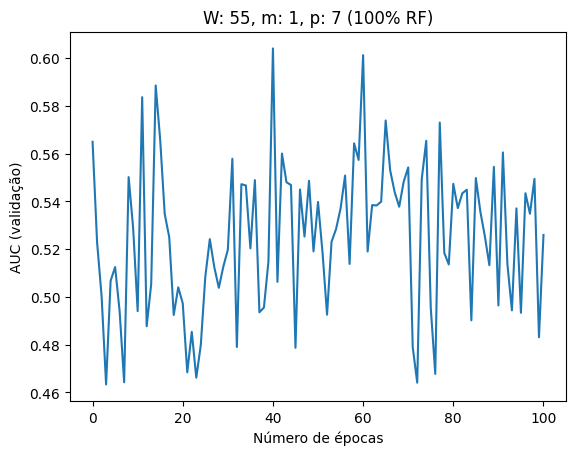

In [21]:
plt.plot(aucs)

title = 'W: ' + str(loaded_data['writers']) + ', m: ' + str(loaded_data['m']) + ', p: '+ str(loaded_data['p'])
title += ' (100% RF)' if loaded_data['same_or_mixed_individuals_in_forgery'] == 'mixed' else '0% RF'

# Adding labels and title
plt.xlabel('Número de épocas')
plt.ylabel('AUC (validação)')
plt.title(title)

# Display the plot
plt.show()

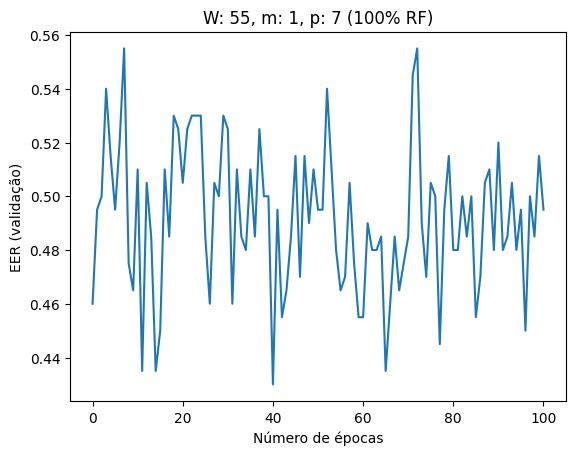

In [22]:
plt.plot(val_eers)

# Adding labels and title
plt.xlabel('Número de épocas')
plt.ylabel('EER (validação)')
plt.title(title)

# Display the plot
plt.show()